### Quadratic Programming (QP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

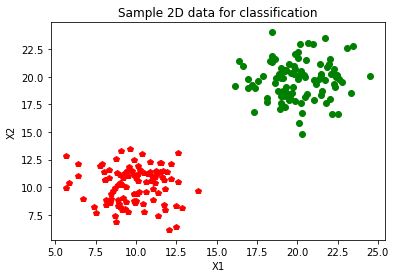

In [2]:
# Synthetic data
mul1 = np.array([10,10])
mul2 = np.array([20,20])
sigma = np.array([[3,0],[0,3]])

X1 = np.random.multivariate_normal(mul1, sigma, 100)
X2 = np.random.multivariate_normal(mul2, sigma, 100)

plt.plot(X1[:,0], X1[:,1], 'rp', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')
plt.title('Sample 2D data for classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
# Combine the classes and set targets
X = np.concatenate((X1,X2),0)
y = np.concatenate((-np.ones((100,1)),np.ones((100,1))),0)
m = X.shape[0]
n = 2

# QP problem: set Q, c, A, b

# Parameters are w, b.
c = np.zeros((n+1,1))
Q = np.eye(n+1)
Q[n,n] = 0
b = - np.ones((m,1))
# A = -[X 1]*y
A = - np.concatenate((X, np.ones((m,1))),1) * y

In [4]:
def cvxopt_solve_qp(Q, c, A=None, b=None, E=None, d=None):
    Q = .5 * (Q + Q.T)  # make sure Q is symmetric
    args = [cvxopt.matrix(Q), cvxopt.matrix(c)]
    if A is not None:
        args.extend([cvxopt.matrix(A), cvxopt.matrix(b)])
        if E is not None:
            args.extend([cvxopt.matrix(E), cvxopt.matrix(d)])
    sol = cvxopt.solvers.qp(*args)
    if 'optimal' not in sol['status']:
        return None
    return np.array(sol['x']).reshape((Q.shape[1],))

In [5]:
opt_params = cvxopt_solve_qp(Q,c,A,b)

     pcost       dcost       gap    pres   dres
 0:  9.1143e-03  2.8585e+01  5e+02  2e+00  2e+03
 1:  6.7522e-02 -3.2968e+01  4e+01  1e-01  2e+02
 2:  7.6830e-02 -4.5069e-01  5e-01  2e-03  2e+00
 3:  6.4386e-02  2.9324e-02  4e-02  1e-15  3e-15
 4:  5.4870e-02  5.1773e-02  3e-03  9e-16  6e-15
 5:  5.4630e-02  5.4591e-02  4e-05  1e-15  2e-14
 6:  5.4627e-02  5.4626e-02  4e-07  9e-16  4e-14
 7:  5.4627e-02  5.4627e-02  4e-09  9e-16  2e-14
Optimal solution found.


In [6]:
opt_params 

array([ 0.25864033,  0.20581193, -6.95039192])

In [7]:
w = opt_params[0:2]
b = opt_params[2]
w,b

(array([0.25864033, 0.20581193]), -6.950391924842985)

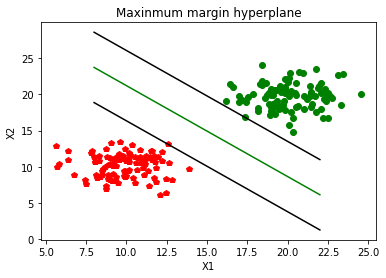

In [8]:
plt.plot(X1[:,0], X1[:,1], 'rp', label='Class 0')
plt.plot(X2[:,0], X2[:,1], 'go', label='Class 1')

x11 = 8
x12 = 22
x21 = (-w[0]*x11-b)/w[1]
x22 = (-w[0]*x12-b)/w[1]
plt.plot((x11, x12),(x21, x22), 'g-', label='line')

# Blue margin line
x21 = (-w[0]* x11 - b + 1)/w[1]
x22 = (-w[0]* x12 - b + 1)/w[1]
plt.plot((x11, x12),(x21, x22), 'k-', label='line')

# Red margin line
x21 = (-w[0]* x11 - b - 1)/w[1]
x22 = (-w[0]* x12 - b - 1)/w[1]
plt.plot((x11, x12),(x21, x22), 'k-', label='line')

plt.title('Maxinmum margin hyperplane')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
np.linalg.norm(w)

0.3305349813190588